In [6]:
%matplotlib inline
import pystan

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [3]:
fit = pystan.stan(model_code=schools_code, data=schools_dat, iter=1000, chains=4)

/usr/lib/python3.4/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)


In [4]:
print(fit)

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.83    0.27   5.06  -2.38   4.79   7.91   10.9  17.83    353   1.01
tau        6.43     0.3    5.5   0.24   2.38   5.02   9.06  20.64    337    1.0
eta[0]      0.4    0.04   0.93  -1.43  -0.18   0.42   1.05   2.18    613    1.0
eta[1]   7.7e-3    0.04   0.89  -1.71  -0.59 8.5e-3   0.59   1.79    618    1.0
eta[2]    -0.19    0.04   0.94  -1.99  -0.87  -0.21   0.44   1.76    597    1.0
eta[3]    -0.02    0.04   0.85  -1.76  -0.54  -0.03   0.55   1.66    568    1.0
eta[4]    -0.36    0.04   0.88  -2.09   -0.9  -0.38   0.19    1.5    561    1.0
eta[5]    -0.19    0.04   0.92  -2.04   -0.8  -0.21   0.42   1.57    581    1.0
eta[6]     0.36    0.04    0.9  -1.48  -0.18    0.4   0.95   2.06    575    1.0
eta[7]     0.

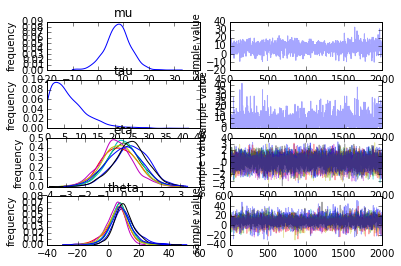

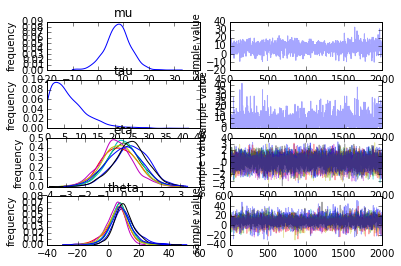

In [7]:
fit.plot()